# DESY1 Published vs. TXPipe Comparison

In [31]:
from chainconsumer import ChainConsumer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Multinest with Published Data Vectors

In [32]:
c = ChainConsumer()

In [33]:
names=['$\\Omega_m$','$\sigma_8$']

In [34]:
# TODO: change to not hardcode 96 for info length and last roews
chain = pd.read_table('multinest_published.txt',skiprows=[row for row in range(1,105)]+[4315+105,4316+105,4317+105,4427+105,4428+105],header=0,dtype=float)

In [35]:
rename_cols = {}
for col in chain.columns[:-4]:
    rename_cols[col] = col.split('--')[1]
chain = chain.rename(columns = rename_cols)

Text(0.5, 1.0, 'Normalised posterior weight $p_i$')

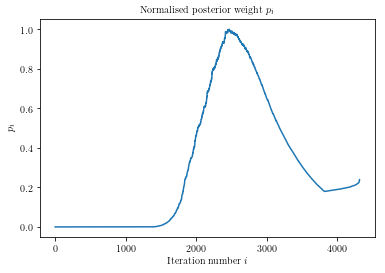

In [36]:
plt.xlabel("Iteration number $i$")
plt.ylabel(r"$p_i$")
chain['weight'][-500:] = np.sort(chain['weight'][-500:])
plt.plot(chain['weight']/chain['weight'].max())
#Add some helpful text, on the title and the plot itself
plt.title("Normalised posterior weight $p_i$", size='medium')
#plt.text(500, 0.4, "Increasing likelihood,\n volume still large", size="small")
#plt.text(5500,0.65, "Volume\ndecreasing", size='small')
#plt.text(6500, 0.12, "Final $n_\mathrm{live}$\npoints", size='small')

In [37]:
# can't sample in omega_m yet
chain['omega_m'] = chain['omega_c'] + chain['omega_b']

In [38]:
ch = np.array([chain['omega_m'],chain['sigma8']], dtype=float).T

In [39]:
w = np.array(chain['weight'], dtype=float)

In [40]:
c.add_chain(ch,parameters=names,weights=w,name=r'\textbf{FireCrown Multinest}')

In [41]:
c.configure(plot_hists=False,sigma2d=False,kde=1.5, colors=["g", "r","b"], linewidths=1.2, 
	legend_kwargs={"loc": "upper right", "fontsize": 10},
	legend_color_text=True, legend_location=(-1, 0),diagonal_tick_labels=False)

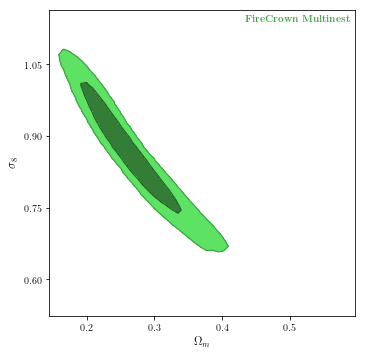

In [42]:
fig = c.plotter.plot(legend='t',figsize="column")

## Multinest with TXPipe Outputs

In [43]:
# TODO: change to not hardcode 96 for info length and last roews
chain = pd.read_table('multinest_chain.txt',skiprows=[row for row in range(1,105)]+[4424+105,4425+105,4426+105,4427+105,4428+105],header=0,dtype=float)

In [44]:
rename_cols = {}
for col in chain.columns[:-4]:
    rename_cols[col] = col.split('--')[1]
chain = chain.rename(columns = rename_cols)

Text(0.5, 1.0, 'Normalised posterior weight $p_i$')

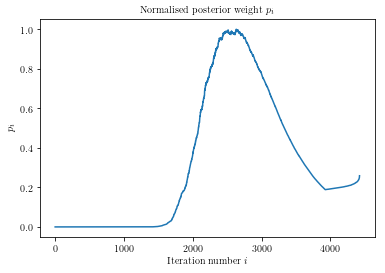

In [45]:
plt.xlabel("Iteration number $i$")
plt.ylabel(r"$p_i$")
chain['weight'][-500:] = np.sort(chain['weight'][-500:])
plt.plot(chain['weight']/chain['weight'].max())
#Add some helpful text, on the title and the plot itself
plt.title("Normalised posterior weight $p_i$", size='medium')
#plt.text(500, 0.4, "Increasing likelihood,\n volume still large", size="small")
#plt.text(5500,0.65, "Volume\ndecreasing", size='small')
#plt.text(6500, 0.12, "Final $n_\mathrm{live}$\npoints", size='small')

In [46]:
# can't sample in omega_m yet
chain['omega_m'] = chain['omega_c'] + chain['omega_b']

In [47]:
ch = np.array([chain['omega_m'],chain['sigma8']], dtype=float).T

In [48]:
w = np.array(chain['weight'], dtype=float)

In [49]:
c.add_chain(ch,parameters=names,weights=w,name=r'\textbf{FireCrown Multinest Published}')

In [50]:
c.configure(plot_hists=False,sigma2d=False,kde=1.5, colors=["g", "r","b"], linewidths=1.2, 
	legend_kwargs={"loc": "upper right", "fontsize": 10},
	legend_color_text=True, legend_location=(-1, 0),diagonal_tick_labels=False)

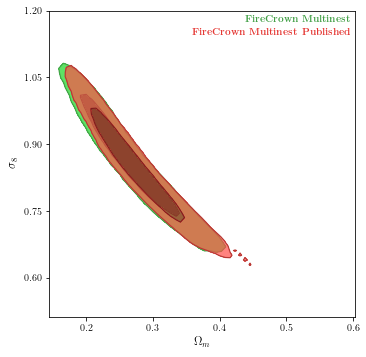

In [51]:
fig = c.plotter.plot(legend='t',figsize="column")

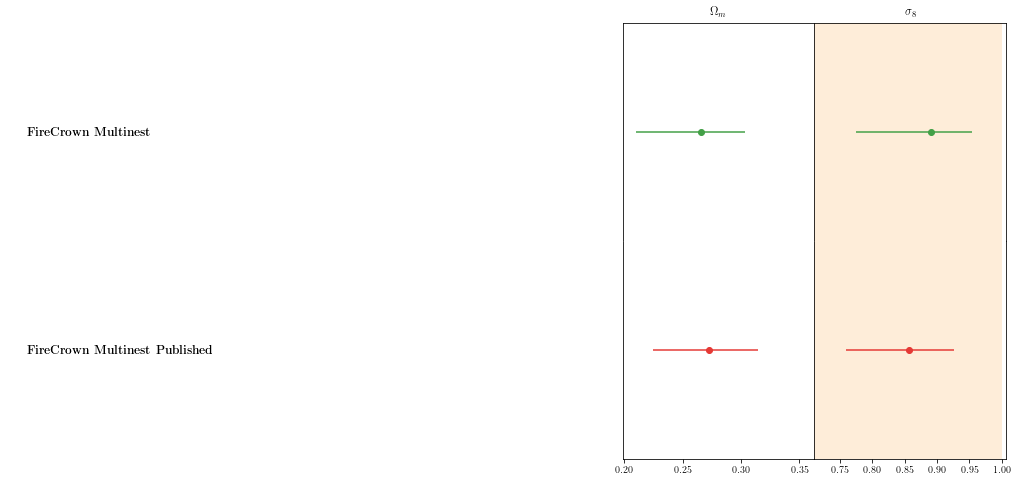

In [52]:
c.configure(legend_color_text=False)
c.configure_truth(ls=":", color="#FB8C00")
fig = c.plotter.plot_summary(errorbar=True, truth=[[0], [-1, 1], [-2, 0, 2]])
fig.set_size_inches(10 + fig.get_size_inches())